In [1]:
%matplotlib inline

import matplotlib.pyplot as plt # para sacar graficos
import pandas as pd
import numpy as np # Calculos matematicos
import seaborn as sns #graficos
import statistics # estadisticas
import scipy.stats # estadisticas

In [2]:
# creando data frame 

df = pd.read_csv("./spotify-2023.csv", encoding="latin-1")

In [3]:
# Limpieza de datos 
missing_values = df.isnull().sum()

data_types = df.dtypes

missing_values, data_types

(track_name               0
 artist(s)_name           0
 artist_count             0
 released_year            0
 released_month           0
 released_day             0
 in_spotify_playlists     0
 in_spotify_charts        0
 streams                  0
 in_apple_playlists       0
 in_apple_charts          0
 in_deezer_playlists      0
 in_deezer_charts         0
 in_shazam_charts        50
 bpm                      0
 key                     95
 mode                     0
 danceability_%           0
 valence_%                0
 energy_%                 0
 acousticness_%           0
 instrumentalness_%       0
 liveness_%               0
 speechiness_%            0
 dtype: int64,
 track_name              object
 artist(s)_name          object
 artist_count             int64
 released_year            int64
 released_month           int64
 released_day             int64
 in_spotify_playlists     int64
 in_spotify_charts        int64
 streams                 object
 in_apple_playlists      

In [4]:
shazam_mode = df['in_shazam_charts'].mode()[0]
key_mode = df['key'].mode()[0]
df['in_shazam_charts'].fillna(shazam_mode, inplace=True)
df['key'].fillna(key_mode, inplace=True)

non_numeric_streams = pd.to_numeric(df['streams'], errors='coerce').isna().sum()
non_numeric_deezer_playlists = pd.to_numeric(df['in_deezer_playlists'], errors='coerce').isna().sum()
non_numeric_shazam_charts = pd.to_numeric(df['in_shazam_charts'], errors='coerce').isna().sum()

non_numeric_streams, non_numeric_deezer_playlists, non_numeric_shazam_charts

(1, 79, 7)

In [5]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

df.dropna(subset=['streams', 'in_deezer_playlists', 'in_shazam_charts'], inplace=True)

cleaned_missing_values = df.isnull().sum()
cleaned_data_types = df.dtypes

cleaned_missing_values, cleaned_data_types

(track_name              0
 artist(s)_name          0
 artist_count            0
 released_year           0
 released_month          0
 released_day            0
 in_spotify_playlists    0
 in_spotify_charts       0
 streams                 0
 in_apple_playlists      0
 in_apple_charts         0
 in_deezer_playlists     0
 in_deezer_charts        0
 in_shazam_charts        0
 bpm                     0
 key                     0
 mode                    0
 danceability_%          0
 valence_%               0
 energy_%                0
 acousticness_%          0
 instrumentalness_%      0
 liveness_%              0
 speechiness_%           0
 dtype: int64,
 track_name               object
 artist(s)_name           object
 artist_count              int64
 released_year             int64
 released_month            int64
 released_day              int64
 in_spotify_playlists      int64
 in_spotify_charts         int64
 streams                 float64
 in_apple_playlists        int64
 in_app

In [6]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [7]:
# limpiando datos

In [8]:

#df['danceability_%'] = df['danceability_%'] / 100
df.head()
#df.info()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


In [9]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            867 non-null    object 
 1   artist(s)_name        867 non-null    object 
 2   artist_count          867 non-null    int64  
 3   released_year         867 non-null    int64  
 4   released_month        867 non-null    int64  
 5   released_day          867 non-null    int64  
 6   in_spotify_playlists  867 non-null    int64  
 7   in_spotify_charts     867 non-null    int64  
 8   streams               867 non-null    float64
 9   in_apple_playlists    867 non-null    int64  
 10  in_apple_charts       867 non-null    int64  
 11  in_deezer_playlists   867 non-null    float64
 12  in_deezer_charts      867 non-null    int64  
 13  in_shazam_charts      867 non-null    float64
 14  bpm                   867 non-null    int64  
 15  key                   8

In [10]:
# Analisis descriptivo de los datos

numerical_stats = df.describe()

key_frequency = df['key'].value_counts()
mode_frequency = df['mode'].value_counts()

numerical_stats, key_frequency, mode_frequency

(       artist_count  released_year  released_month  released_day  \
 count    867.000000     867.000000      867.000000    867.000000   
 mean       1.574394    2019.223760        6.152249     14.147636   
 std        0.913051      10.570264        3.508798      9.005073   
 min        1.000000    1930.000000        1.000000      1.000000   
 25%        1.000000    2021.000000        3.000000      6.000000   
 50%        1.000000    2022.000000        6.000000     13.000000   
 75%        2.000000    2022.000000        9.000000     22.000000   
 max        8.000000    2023.000000       12.000000     31.000000   
 
        in_spotify_playlists  in_spotify_charts       streams  \
 count            867.000000         867.000000  8.670000e+02   
 mean            3371.915802          10.807382  4.058458e+08   
 std             4042.566785          18.111052  4.093741e+08   
 min               31.000000           0.000000  2.762000e+03   
 25%              817.500000           0.000000  1.3

# FRECUENCIA DE APARICION DE LOS ARTISTAS MAS SONADOS

In [11]:
#find frequency of each letter grade

frec_artista = pd.crosstab(index=df['artist(s)_name'], columns='count')
frec_artista = frec_artista.sort_values(by='count', ascending=False)
frec_artista



col_0,count
artist(s)_name,
Taylor Swift,33
The Weeknd,20
SZA,19
Bad Bunny,19
Harry Styles,16
...,...
"Halsey, Suga",1
"Halsey, BTS",1
Halsey,1


# DISTRIBUCION POR TONALIDAD 

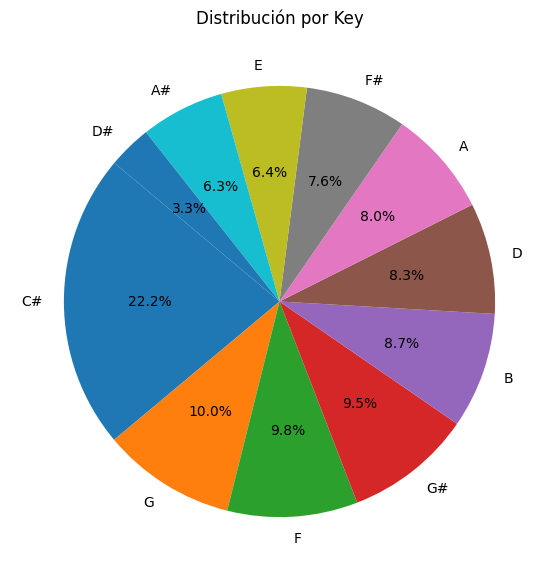

In [15]:
# Calcular el conteo de cada valor único en la columna 'key'
conteo_por_key = df['key'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(10, 7))  # Puedes ajustar el tamaño según tus necesidades
plt.pie(conteo_por_key, labels=conteo_por_key.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución por Key')
plt.show()

# CORRELACION ENTRE LOS BPM Y EL % DE BAILABILIDAD


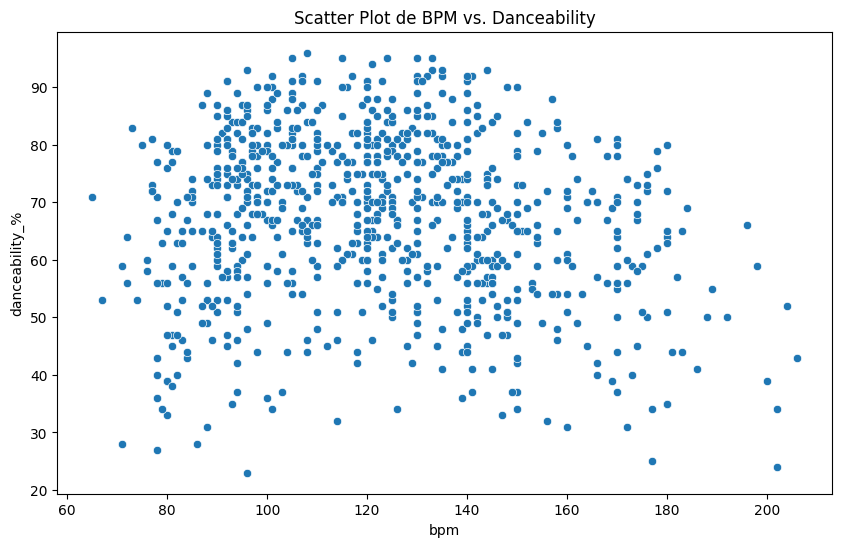

In [16]:
# Crear un scatter plot entre 'bpm' y 'danceability_%' usando Seaborn
plt.figure(figsize=(10, 6))  # Puedes ajustar el tamaño según tus necesidades
sns.scatterplot(x='bpm', y='danceability_%', data=df)
plt.title('Scatter Plot de BPM vs. Danceability')
plt.show()

# CORRELACION ENTRE STREAMS Y PLAYLIST EN SPOTIFY

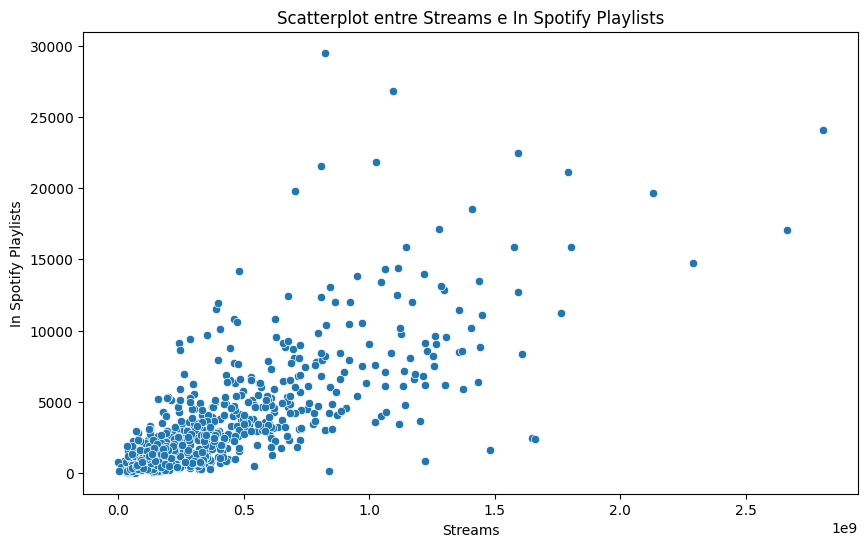

In [17]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))  # Puedes ajustar el tamaño según tus necesidades
sns.scatterplot(x='streams', y='in_spotify_playlists', data=df)

plt.title('Scatterplot entre Streams e In Spotify Playlists')
plt.xlabel('Streams')
plt.ylabel('In Spotify Playlists')
plt.show()

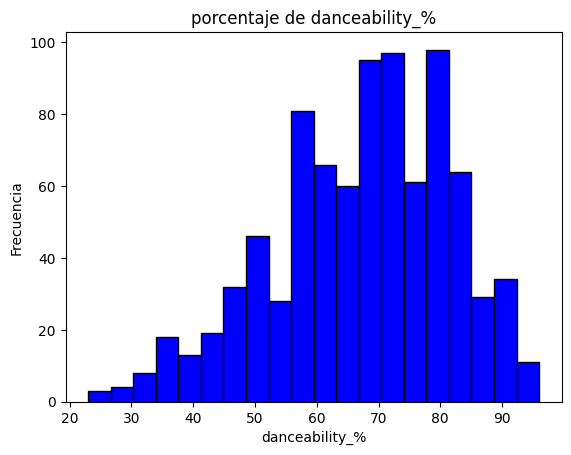

In [12]:
# Histograma con dance
plt.hist(df['danceability_%'], bins=20, color='blue', edgecolor='black')
plt.title('porcentaje de danceability_%')
plt.xlabel('danceability_%')
plt.ylabel('Frecuencia')
plt.show()

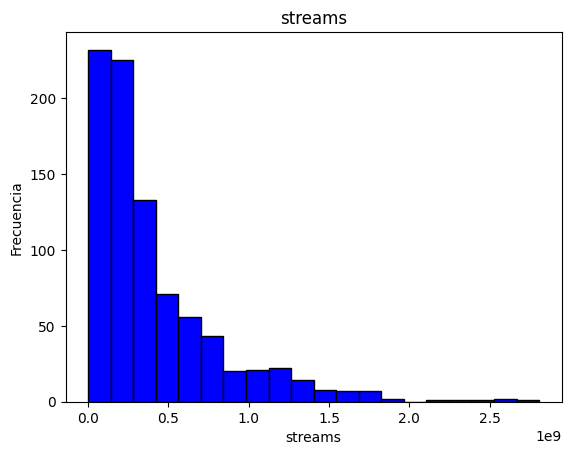

In [13]:
# Histograma con dance
plt.hist(df['streams'], bins=20, color='blue', edgecolor='black')
plt.title('streams')
plt.xlabel('streams')
plt.ylabel('Frecuencia')
plt.show()